Solar Indirect Cooling System Data:
    Time (Hour)  Solar Radiation (W/m²)  Solar Energy Collected (kWh)  \
0             6                     100                        1.7550   
1             7                     200                        3.5100   
2             8                     400                        7.0200   
3             9                     600                       10.5300   
4            10                     750                       13.1625   
5            11                     800                       14.0400   
6            12                     850                       14.9175   
7            13                     900                       15.7950   
8            14                     880                       15.4440   
9            15                     700                       12.2850   
10           16                     500                        8.7750   
11           17                     300                        5.2650   
12           18

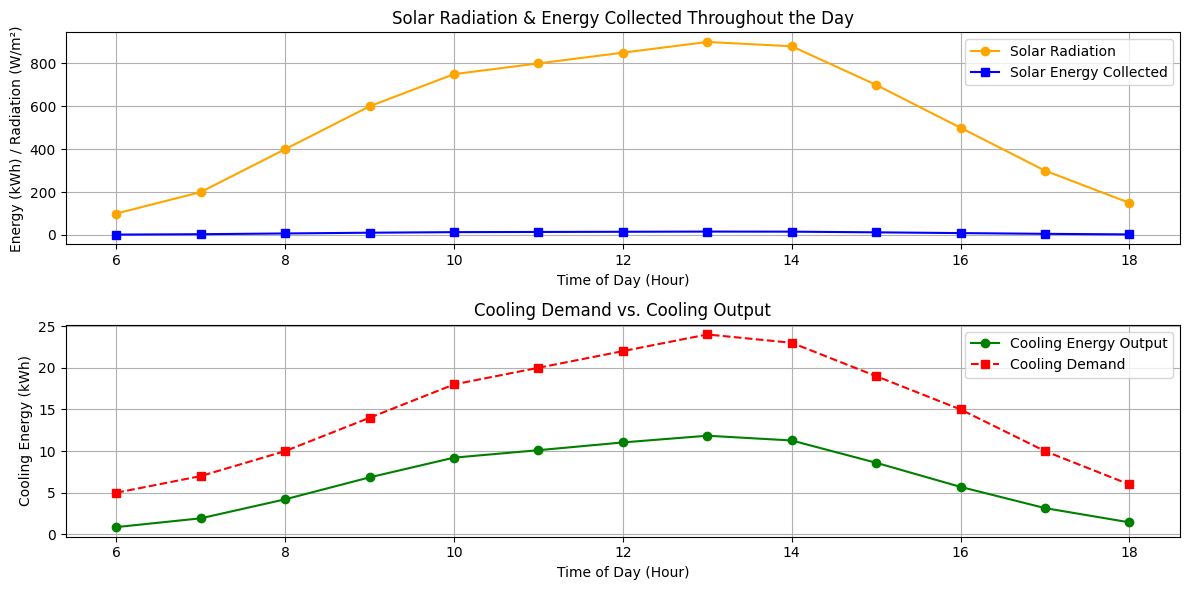

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters
time_hours = np.arange(6, 19, 1)  # From 6 AM to 6 PM

# Simulated hourly solar radiation (W/m²) based on a sunny day pattern
solar_radiation = np.array([100, 200, 400, 600, 750, 800, 850, 900, 880, 700, 500, 300, 150])

# Parameters for solar collectors
collector_area = 30  # m² (increased for more cooling power)
collector_efficiency = 0.65  # Efficiency of solar collector

# Absorption chiller COP variations based on temperature conditions
cop_cooling = np.array([0.5, 0.55, 0.6, 0.65, 0.7, 0.72, 0.74, 0.75, 0.73, 0.7, 0.65, 0.6, 0.55])

# Energy losses in the system (10% loss assumed)
energy_loss_factor = 0.9

# Cooling demand variations (kW) – Simulating a building's cooling requirement
cooling_demand = np.array([5, 7, 10, 14, 18, 20, 22, 24, 23, 19, 15, 10, 6])

# Calculate solar energy collected (kWh)
solar_energy_collected = (solar_radiation * collector_area * collector_efficiency) / 1000  # Convert W to kW

# Apply energy losses
solar_energy_collected *= energy_loss_factor

# Calculate cooling energy output
cooling_energy_output = solar_energy_collected * cop_cooling  # kW

# Create a DataFrame
data = {
    "Time (Hour)": time_hours,
    "Solar Radiation (W/m²)": solar_radiation,
    "Solar Energy Collected (kWh)": solar_energy_collected,
    "Cooling Output (kWh)": cooling_energy_output,
    "Cooling Demand (kW)": cooling_demand
}

df = pd.DataFrame(data)

# Display Data
print("Solar Indirect Cooling System Data:")
print(df)

# Plot the data
plt.figure(figsize=(12, 6))

# Solar Radiation vs Collected Energy
plt.subplot(2, 1, 1)
plt.plot(df["Time (Hour)"], df["Solar Radiation (W/m²)"], label="Solar Radiation", color="orange", marker="o")
plt.plot(df["Time (Hour)"], df["Solar Energy Collected (kWh)"], label="Solar Energy Collected", color="blue", marker="s")
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Energy (kWh) / Radiation (W/m²)")
plt.title("Solar Radiation & Energy Collected Throughout the Day")
plt.legend()
plt.grid(True)

# Cooling Demand vs Cooling Output
plt.subplot(2, 1, 2)
plt.plot(df["Time (Hour)"], df["Cooling Output (kWh)"], label="Cooling Energy Output", color="green", marker="o")
plt.plot(df["Time (Hour)"], df["Cooling Demand (kW)"], label="Cooling Demand", color="red", marker="s", linestyle="--")
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Cooling Energy (kWh)")
plt.title("Cooling Demand vs. Cooling Output")
plt.legend()
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()
